## week06_homework
Matplotlib 繪圖一題，價量關係圖一題。

## Matplotlib 繪圖 

> 下列兩個檔案分別為[2892_第一金](2892_202110.csv)與[5880_合庫金](5880_202110.csv) 在十月分的收盤價資料，  
請依據資料繪製這兩家公司收盤價"比較"折線圖。  
  請將圖片大小設定為(15,10)，並同時須加上標題、圖例、X和Y軸的格線與名稱。  

範例如下:
![](img/2892_5880.jpg)

> 請利用TEJ_2330_2019TO2020.csv資料，繪製出四個子圖，內容分別為收盤價(折線圖)、最高價(折線圖)、最低價(折線圖)與成交量(長條圖)。  
請將圖片大小設定為(15,15)，每張子圖都需要有標題、X和Y軸的名稱。

範例如下:
![](img/1.png)

![](subplot.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s2892 = pd.read_csv('data/2892_202110.csv')
day = s2892['day']
p2892 = s2892['price']
s5880 = pd.read_csv('data/5880_202110.csv')
p5880 = s5880['price']

plt.figure(figsize=(15,10))
#plt.plot(day,p2886)
plt.plot(day,p2892, label = '2892')
plt.plot(day,p5880, label = '5880')
plt.title('2892 vs 5880')
plt.grid()
plt.gcf().autofmt_xdate()
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
#plt.show()
print(day)

0     2021/10/01
1     2021/10/04
2     2021/10/05
3     2021/10/06
4     2021/10/07
5     2021/10/08
6     2021/10/12
7     2021/10/13
8     2021/10/14
9     2021/10/15
10    2021/10/18
11    2021/10/19
12    2021/10/20
13    2021/10/21
14    2021/10/22
15    2021/10/25
16    2021/10/26
17    2021/10/27
Name: day, dtype: object


[datetime.datetime(2021, 10, 1, 0, 0), datetime.datetime(2021, 10, 4, 0, 0), datetime.datetime(2021, 10, 5, 0, 0), datetime.datetime(2021, 10, 6, 0, 0), datetime.datetime(2021, 10, 7, 0, 0), datetime.datetime(2021, 10, 8, 0, 0), datetime.datetime(2021, 10, 12, 0, 0), datetime.datetime(2021, 10, 13, 0, 0), datetime.datetime(2021, 10, 14, 0, 0), datetime.datetime(2021, 10, 15, 0, 0), datetime.datetime(2021, 10, 18, 0, 0), datetime.datetime(2021, 10, 19, 0, 0), datetime.datetime(2021, 10, 20, 0, 0), datetime.datetime(2021, 10, 21, 0, 0), datetime.datetime(2021, 10, 22, 0, 0), datetime.datetime(2021, 10, 25, 0, 0), datetime.datetime(2021, 10, 26, 0, 0), datetime.datetime(2021, 10, 27, 0, 0)]


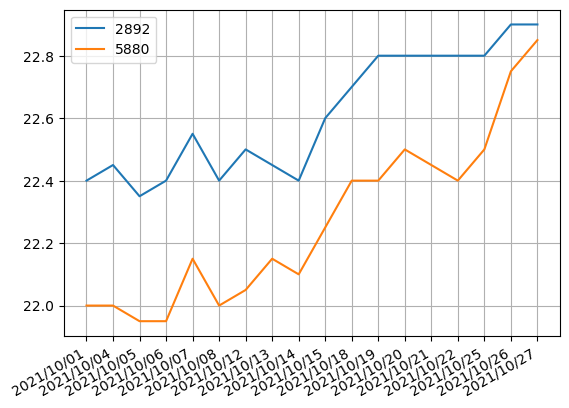

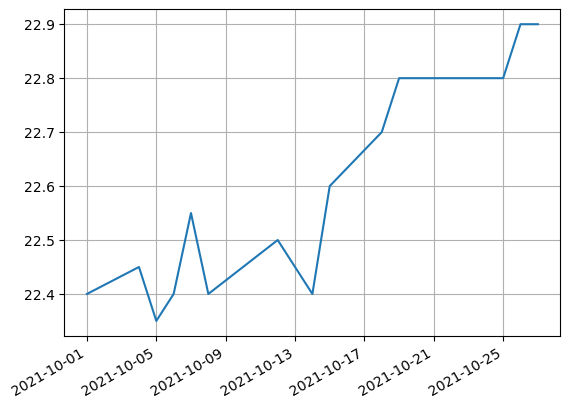

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

s2892 = open('data/2892_202110.csv').readlines()
s2892 = [line.strip('\n').split(',') for line in s2892[1:]]

s5880 = open('data/5880_202110.csv').readlines()
s5880 = [line.strip('\n').split(',') for line in s5880[1:]]
#print(s2892)
price_2892 = [float(line[1]) for line in s2892]
price_5880 = [float(line[1]) for line in s5880]
#print(price_2892)
day = [datetime.strptime(line[0], "%Y/%m/%d") for line in s2892]
#print(len(day))
x = np.arange(len(day))

#plt.figure(figsize=(5,5))
plt.plot(x, price_2892, label = '2892')
plt.plot(x, price_5880, label = '5880')
plt.gcf().autofmt_xdate()
plt.grid()
print(day)
plt.xticks(x,[line.strftime('%Y/%m/%d') for line in day])
plt.legend()
plt.show()

plt.plot(day, price_2892)
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()

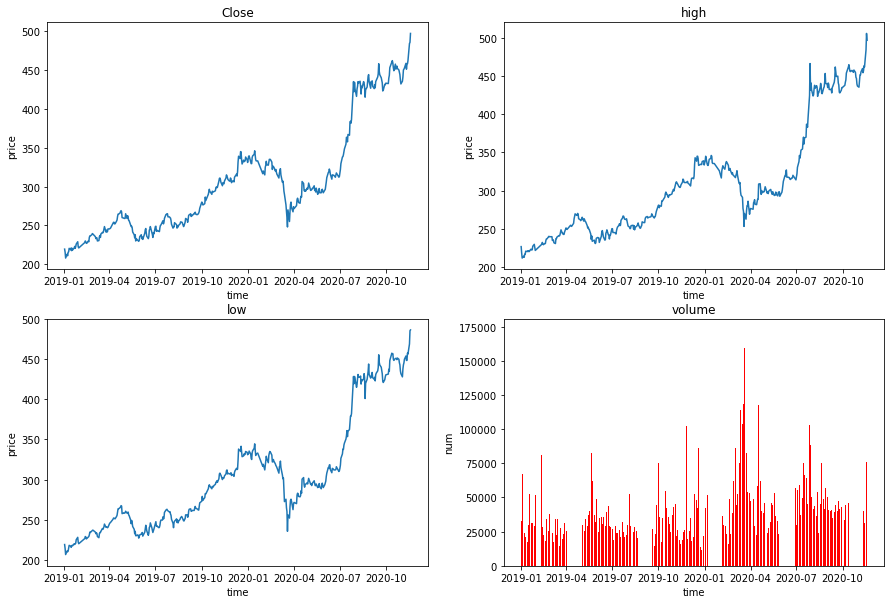

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# 設定時間坐標軸
import matplotlib.dates as mdates

data = pd.read_csv('data/TEJ_2330_2019TO2020.csv',parse_dates=True)
data['Date'] = pd.to_datetime(data['Date'])
day = data['Date']
close = data['Close']
high = data['High']
low = data['Low']
volume = data['Volume']

plt.figure(figsize = (15, 10))

# 設定X坐標軸顯示_時間坐標軸
# x座標每月顯示一次，每年顯示一次則改為YearLocator()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  

plt.subplot(221)
plt.plot(day, close)
plt.title("Close")
plt.xlabel('time')
plt.ylabel('price')

plt.subplot(222)
plt.plot(day, high)
plt.title("high")
plt.xlabel('time')
plt.ylabel('price')

plt.subplot(223)
plt.plot(day, low)
plt.title("low")
plt.xlabel('time')
plt.ylabel('price')

plt.subplot(224)
plt.bar(day, volume, color='red')
plt.title("volume")
plt.xlabel('time')
plt.ylabel('num')
plt.show()

# 價量關係圖

>請使用使用TEJ下載至少3個月的開高低收及成交量的資料，  
找出該股價期間內的最高價與最低價，一併繪製到價量關係圖上。  
請將繪製黏再一起的價量關係圖，圖片大小設定為(8,4)，圖例名稱為最高價與最低價。

範例如下:
![](img/2886_2021.png)

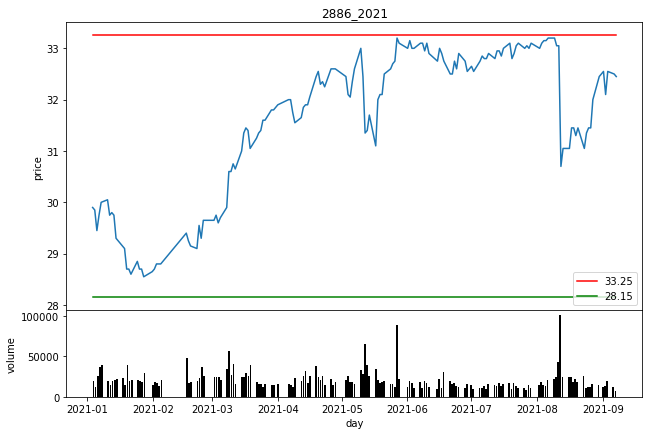

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

stock = pd.read_csv('data/2886_2021.csv', encoding = 'utf8')
#print("data_five:\n",stock.head())

day = np.array(stock['Date'])
day = [datetime.strptime(data, "%Y/%m/%d") for data in day]

close = stock['Close']
high = stock['High']
low = stock['Low']
high_price = high.max()
high_line = np.full(len(day), high_price)
low_price = low.min()
low_line = np.full(len(day), low_price)
price = np.full(len(day), 31.6)
volume = stock['Volume']

buy = [np.nan] * len(day)
        
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_axes([0,0.3,1,1])
ax2 = fig.add_axes([0,0,1,0.3])


ax1.plot(day, close)
ax1.plot(day, high_line, 'r', label = high_price)
ax1.plot(day, low_line, 'g', label = low_price)
ax1.legend(loc = 4)
ax2.bar(day, volume, color ='black')
ax1.set(ylabel = "price", title = "2886_2021")
ax2.set(ylabel = "volume", xlabel = "day")
plt.show()

2
3
4


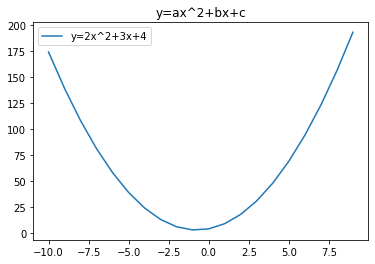

In [7]:
import numpy as np
import matplotlib.pyplot as plt
a = int(input())
b = int(input())
c = int(input())
x = np.arange(-10,10)
y = a*(x*x)+b*x+c #ax^2+bx+c
#print(y)

plt.plot(x,y,label = "y="+str(a)+"x^2+"+str(b)+"x+"+str(c))
#plt.axhline(y=0)# x軸
#plt.axvline(x=0)# y軸
plt.legend()
plt.title("y=ax^2+bx+c")
plt.show()